

Evaluation:


Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


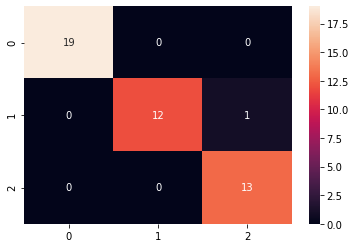



Overfitting Report:
{'fit_time': array([0.01158214, 0.01037621, 0.00878882, 0.0091393 , 0.00715709]), 'score_time': array([0.00137591, 0.00137711, 0.0010922 , 0.00137877, 0.00170493]), 'test_score': array([0.9       , 1.        , 0.9       , 0.96666667, 1.        ]), 'train_score': array([0.96666667, 0.95      , 0.975     , 0.95833333, 0.95      ])}


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



Answer:
Petal length: 4, Petal width: 2 merupakan Species Iris-versicolor
Petal length: 2.4, Petal width: 3 merupakan Species Iris-versicolor
Petal length: 5.6, Petal width: 3.3 merupakan Species Iris-virginica


Plot:


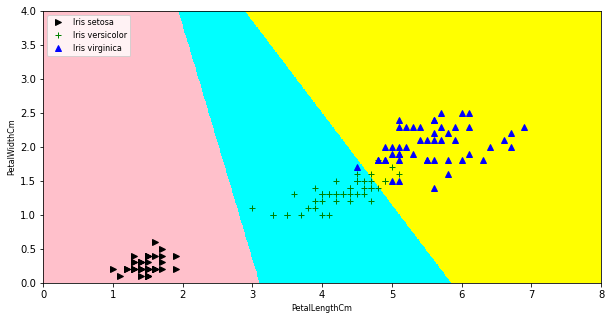

In [1]:
import matplotlib.pyplot as plt
import warnings # tambahan agar tidak muncul warnings saat running
warnings.simplefilter("ignore")

# data frame
import pandas as pd # import pandas
iris_df = pd.read_csv('Iris(1).csv') # dataset

# feature selection
df = iris_df[['PetalLengthCm', 'PetalWidthCm','Species']] # pemilihan X sesuai soal

# label encoding species's column
from sklearn import preprocessing # import preprocessing
le = preprocessing.LabelEncoder() # membentuk variabel sebagai label encoder
le.fit(('Iris-setosa','Iris-versicolor','Iris-virginica')) # fit labelencoder ke 'Iris-setosa','Iris-versicolor','Iris-virginica'
df['Species'] = le.transform(df['Species']) # encode 'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2 pada kolom Species

# feature
X = df[['PetalLengthCm', 'PetalWidthCm']] # feature dari X
y = df['Species'] # membentuk y

# train - test split
from sklearn.model_selection import train_test_split # import train_test_split untuk splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) # split data dengan perbadingan 7:3

# model
from sklearn.linear_model import LogisticRegression # import LogisticRegression
model = LogisticRegression(C = 0.04).fit(X_train, y_train) # membentuk model fit X_train dan y_train dengan C = 0.04

# prediction
y_predict = model.predict(X_test) # prediksi dari model

# evaluation
print('\n')
print('Evaluation:')

print('\n')
print('Confusion Matrix:')

# confusion matrix
from sklearn.metrics import confusion_matrix # import confusion_matrix
print(confusion_matrix(y_test, y_predict)) # mencetak nilai confusion_matrix nya

# plotting confusion matrix
import seaborn as sns # import seaborn
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True) # memplot confusion_matrix nya
plt.show() # show plot

print('\n')
print('Overfitting Report:')

# checking for overfitting
from sklearn.model_selection import cross_validate # import cross_validate
print(cross_validate(model,X,y,return_train_score = True)) # mencetak hasil cross_validate

print('\n')
print('Classification Report:')

# classification report
from sklearn.metrics import classification_report # import classification_report
print(classification_report(y_test, y_predict)) # mencetak hasil classification_report

print('\n')
print('Answer:')

# answer
i = [[4, 2], [2.4, 3], [5.6, 3.3]] # list yang berisi pertanyaan soal
for n in range (len(i)): # looping for dari n sepanjag len(i)
    predict = model.predict([i[n]]) # prediksi dari tiap indeks i 
    if predict == [0]: # jika hasil prediksi = [0]
        answer = 'Iris-setosa' # assign 'Iris-setosa' ke variabel answer
    elif predict == [1]: # jika hasil prediksi = [0]
        answer = 'Iris-versicolor' # assign 'Iris-versicolor' ke variabel answer
    else: # jika hasil prediksi selain [0] dan [1]
        answer = 'Iris-virginica' # assign 'Iris-virginica' ke variabel answer
    # mencetak
    print('Petal length: {0}, Petal width: {1} merupakan Species {2}'.format(i[n][0], i[n][1], answer))
    
print('\n')
print('Plot:')

# plotting
import numpy as np # import numpy
import matplotlib.pyplot as plt # import matplotlib.pyplot
# agar plot lebih bagus
%matplotlib inline

titik_x1, titik_x2 = np.meshgrid(np.linspace(0, 8, 650).reshape(-1, 1), np.linspace(0, 4, 350).reshape(-1, 1),)
# mengambil titik_x1 dengan dimulai dari 0 berhenti di 8 dengan membagi sebanyak 650 point , 
# mengambil titik_x2 dengan dimulai dari 0 berhenti di 4 dengan membagi sebanyak 350 point

Xplot = np.c_[titik_x1.ravel(), titik_x2.ravel()] # .ravel() untuk menyesuaikan ukuran sesuai dengan transformasi
Yplot = model.predict(Xplot) # y plot yang dibentuk dari prediksi model terhadap x plot
area = Yplot.reshape(titik_x1.shape) # membentuk variabel area dengan mereshape sesuai dengan shape titik_x1

plt.figure(figsize=(10, 5)) # ukuran figure
# scatter plot untuk Iris-setosa yakni y = 0 pada kolom 'Species' dengan 0, 1 indeks PetalLengthCm dan PetalwidthCm
plt.plot(X[y==0].iloc[:,0], X[y==0].iloc[:,1], 'k>', label = 'Iris setosa') # dengan m merupakan warna hitam , dan marker '>'
# kemudian diberikan label Iris setosa dan simbol sesuai dengan yang ditentukan
# scatter plot untuk Iris-versicolor yakni y = 1 pada kolom 'Species' dengan 0, 1 indeks PetalLengthCm dan PetalwidthCm
plt.plot(X[y==1].iloc[:,0], X[y==1].iloc[:,1], 'g+', label = 'Iris versicolor') # dengan r merupakan warna hijau , dan marker '+'
# kemudian diberikan label Iris versicolor dan simbol sesuai dengan yang ditentukan
# scatter plot untuk Iris-virginica yakni y = 1 pada kolom 'Species' dengan 0, 1 indeks PetalLengthCm dan PetalwidthCm
plt.plot(X[y==2].iloc[:,0], X[y==2].iloc[:,1], 'b^', label = 'Iris virginica') # dengan g merupakan warna biru , dan marker '^'
# kemudian diberikan label Iris virginica dan simbol sesuai dengan yang ditentukan

from matplotlib.colors import ListedColormap # import ListedColormap
custom_cmap = ListedColormap(['pink','cyan','yellow']) # memberi warna untuk map area
plt.contourf(titik_x1, titik_x2, area, cmap= custom_cmap) # membentuk background contour
plt.xlabel('PetalLengthCm', fontsize = 8) # memberi nama sumbu x 'PetalLengthCm'
plt.ylabel('PetalWidthCm', fontsize = 8) # memberi nama sumbu y 'PetalWidthCm'
plt.legend(loc = 'upper left', fontsize = 8) # memberikan legend dengan lokasi atas kanan
plt.axis([0, 8, 0, 4]) # mengatur panjang sumbu
plt.show() # show plot